<a href="https://colab.research.google.com/github/YehorManevych/ViT/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 To enable GPU acceleration: \
1️⃣ Select “Runtime” from the top menu and then \
2️⃣ Click on “Change runtime type.” \
3️⃣ In the “Hardware accelerator” dropdown, select “GPU” and then \
4️⃣ Click “Save.”\

❗WARNING❗ This notebook requires access to your Google Drive in order to run. It's necessary to store code, datasets and models.

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Update pip and setuptools
%%python -m pip install -U pip
%pip install --upgrade setuptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
# Restart the runtime
import os
os.kill(os.getpid(), 9)

In [3]:
# Clone the project
%cd /content/gdrive/MyDrive
!git clone https://github.com/YehorManevych/ViT

/content/gdrive/MyDrive
Cloning into 'ViT'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 41 (delta 10), reused 37 (delta 6), pack-reused 0
Receiving objects: 100% (41/41), 7.17 MiB | 12.43 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [4]:
# Install all the modules
%pip install --no-cache-dir -r /content/gdrive/MyDrive/ViT/requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.5 MB/s eta 0:00:00
  Obtaining dependency information for async-lru from https://files.pythonhosted.org/packages/fa/9f/3c3503693386c4b0f245eaf5ca6198e3b28879ca0a40bde6b0e319793453/async_lru-2.0.4-py3-none-any.whl.metadata
  Obtaining dependency information for bqplot from https://files.pythonhosted.org/packages/e6/24/78ef6414e1b8c4ec2257ece4b5d138cc141213da83f3361087841fc8da30/bqplot-0.12.40-py2.py3-none-any.whl.metadata
  Obtaining dependency information for chess from https://files.pythonhosted.org/packages/d6/d8/15cfcb738d2518daf04d34b23419bd359cbd8e09da50778ebac521774fc8/chess-1.10.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.8 MB/s eta 0:0

In [ ]:
# Restart the runtime
import os
os.kill(os.getpid(), 9)

/content/gdrive/MyDrive/ViT
Using device: cuda
Creating datasets
Creating datasets
File size is 1557161267 bytes


Downloading:   0%|          | 0/1486 [00:00<?, ?it/s]

Archive is downloaded! /content/gdrive/MyDrive/ViT/datasets/imagenette2.tgz
Extracting the archive
Archive is extracted to /content/gdrive/MyDrive/ViT/datasets/imagenette2
Formatting Imagenette2 dataset
Renaming train
Renaming test
Imagenette2 is ready! /content/gdrive/MyDrive/ViT/datasets/imagenette2_format


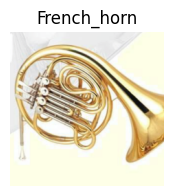

Creating the reference model


Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:04<00:00, 69.4MB/s]


Evaluating the reference model


Evaluating:   0%|          | 0/123 [00:00<?, ?it/s]

{'Accuracy': tensor(0.9299), 'Loss': tensor(0.0103), 'Precision': tensor(0.1176), 'Recall': tensor(0.1091)}
Precision and Recall are low because the model is only evaluated on a suabset of IMAGENET classes


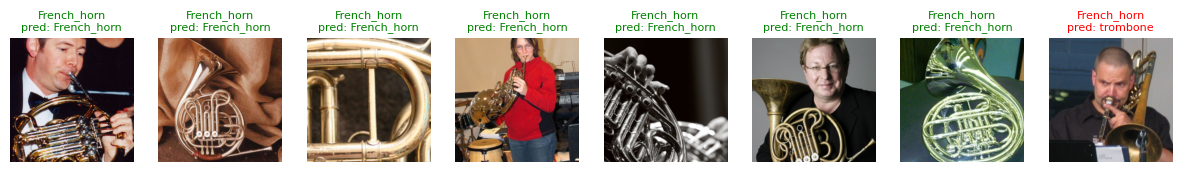

Creating the replicated model
Layer (type (var_name))                       Kernel Shape              Input Shape               Output Shape              Param #
ViT (ViT)                                     --                        [1, 3, 224, 224]          [1, 1000]                 768
├─Conv2d (conv_proj)                          [16, 16]                  [1, 3, 224, 224]          [1, 768, 14, 14]          590,592
├─Flatten (flatten)                           --                        [1, 768, 14, 14]          [1, 768, 196]             --
├─Encoder (encoder)                           --                        [1, 197, 768]             [1, 197, 768]             151,296
│    └─Sequential (layers)                    --                        [1, 197, 768]             [1, 197, 768]             --
│    │    └─EncoderBlock (0)                  --                        [1, 197, 768]             [1, 197, 768]             --
│    │    │    └─LayerNorm (ln_1)             --                 

Evaluating:   0%|          | 0/123 [00:00<?, ?it/s]

{'Accuracy': tensor(0.9299), 'Loss': tensor(0.0103), 'Precision': tensor(0.1176), 'Recall': tensor(0.1091)}
Precision and Recall are low because the model is only evaluated on a suabset of IMAGENET classes


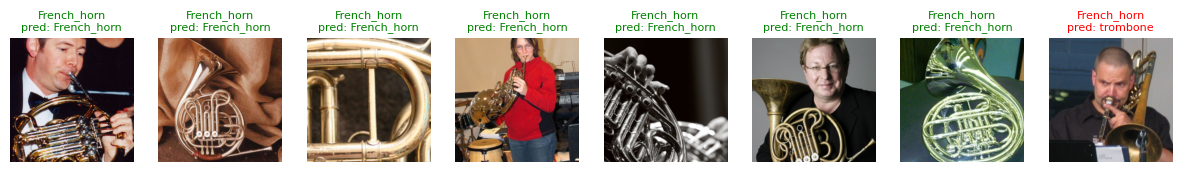

Saving the replicated modet
Model is saved to /content/gdrive/MyDrive/ViT/models/2023-08-30_17.07.54_ViT_93%_.pth


In [1]:
# Create the replica of ViT and compare it's performance to the reference model
%cd /content/gdrive/MyDrive/ViT
%run replication.ipynb

Using device: cuda
Loading CIFAR-10 dataset


100%|██████████| 170498071/170498071 [00:04<00:00, 40394930.26it/s]


Extracting datasets/CIFAR-10/cifar-10-python.tar.gz to datasets/CIFAR-10
Created 200 train batches of size 128
Files already downloaded and verified
Created 50 test batches of size 128


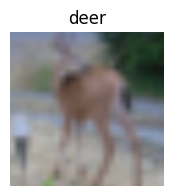

Creating the reference model
Freezing the model and swapping it's classification head
Fine-tuning the reference model


Epochs:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 0


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batch 66:
Train: Accuracy = 0.795, Loss = 0.006, Precision = 0.803, Recall = 0.794
Testing:


Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

Test: Accuracy = 0.912, Loss = 0.003, Precision = 0.914, Recall = 0.912

Batch 133:
Train: Accuracy = 0.917, Loss = 0.002, Precision = 0.917, Recall = 0.917
Testing:


Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

Test: Accuracy = 0.923, Loss = 0.002, Precision = 0.924, Recall = 0.923

Batch 199:
Train: Accuracy = 0.927, Loss = 0.002, Precision = 0.927, Recall = 0.927
Testing:


Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

Test: Accuracy = 0.927, Loss = 0.002, Precision = 0.928, Recall = 0.928



Epoch 1


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batch 66:
Train: Accuracy = 0.932, Loss = 0.002, Precision = 0.932, Recall = 0.932
Testing:


Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

Test: Accuracy = 0.932, Loss = 0.002, Precision = 0.932, Recall = 0.932

Batch 133:
Train: Accuracy = 0.933, Loss = 0.002, Precision = 0.934, Recall = 0.934
Testing:


Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

Test: Accuracy = 0.932, Loss = 0.002, Precision = 0.933, Recall = 0.932

Batch 199:
Train: Accuracy = 0.934, Loss = 0.002, Precision = 0.934, Recall = 0.934
Testing:


Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

Test: Accuracy = 0.935, Loss = 0.002, Precision = 0.935, Recall = 0.935





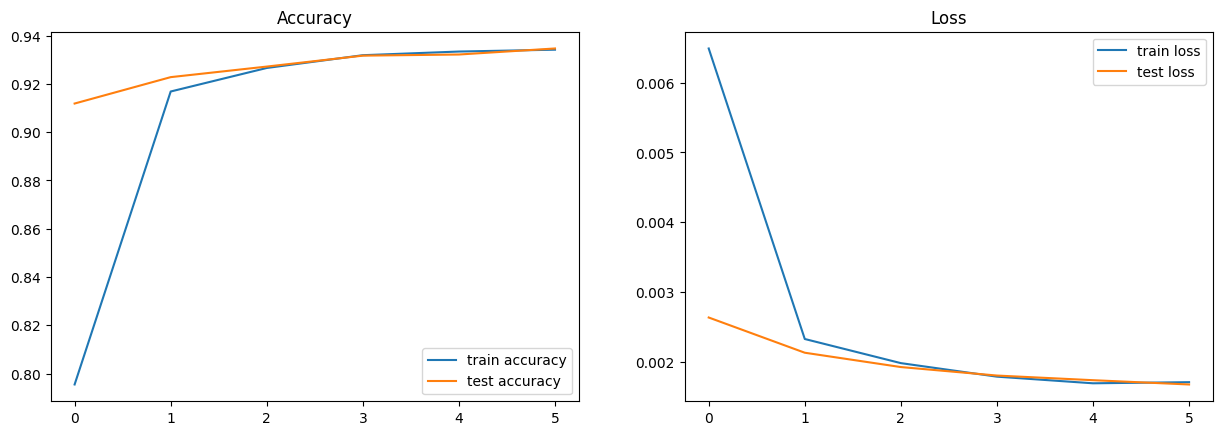

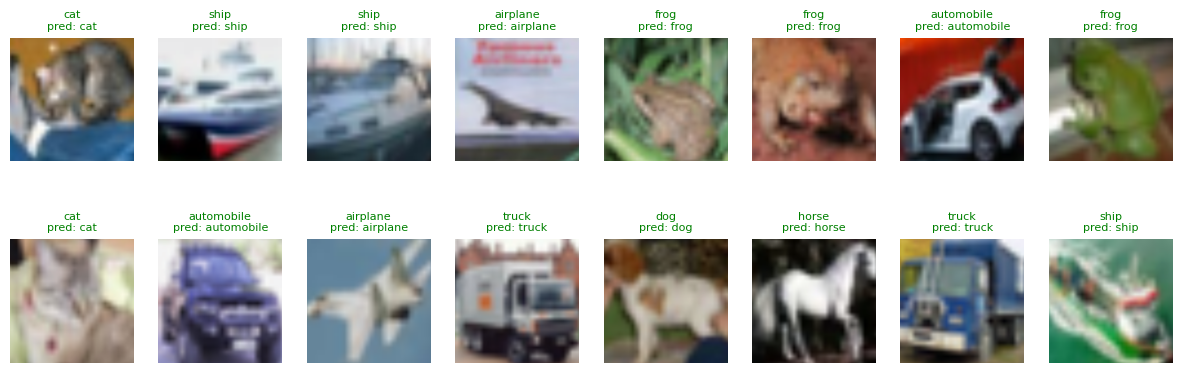

Model is saved to /content/gdrive/MyDrive/ViT/models/2023-08-30_17.36.13_VisionTransformer_93%_FT_CIFAR.pth
Creating the replicated model
Loading last saved ViT model
Loading model from /content/gdrive/MyDrive/ViT/models/2023-08-30_17.07.54_ViT_93%_.pth
Freezing the model and swapping it's classification head
Fine-tuning the replicated model


Epochs:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 0


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batch 66:
Train: Accuracy = 0.737, Loss = 0.008, Precision = 0.740, Recall = 0.736
Testing:


Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

Test: Accuracy = 0.904, Loss = 0.003, Precision = 0.907, Recall = 0.904

Batch 133:
Train: Accuracy = 0.877, Loss = 0.003, Precision = 0.877, Recall = 0.877
Testing:


Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

Test: Accuracy = 0.913, Loss = 0.002, Precision = 0.915, Recall = 0.913

Batch 199:
Train: Accuracy = 0.891, Loss = 0.003, Precision = 0.892, Recall = 0.892
Testing:


Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

Test: Accuracy = 0.920, Loss = 0.002, Precision = 0.922, Recall = 0.921



Epoch 1


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

Batch 66:
Train: Accuracy = 0.895, Loss = 0.003, Precision = 0.895, Recall = 0.895
Testing:


Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

Test: Accuracy = 0.923, Loss = 0.002, Precision = 0.925, Recall = 0.923

Batch 133:
Train: Accuracy = 0.898, Loss = 0.003, Precision = 0.898, Recall = 0.899
Testing:


Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

Test: Accuracy = 0.922, Loss = 0.002, Precision = 0.925, Recall = 0.923

Batch 199:
Train: Accuracy = 0.894, Loss = 0.003, Precision = 0.893, Recall = 0.893
Testing:


Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

Test: Accuracy = 0.924, Loss = 0.002, Precision = 0.927, Recall = 0.925





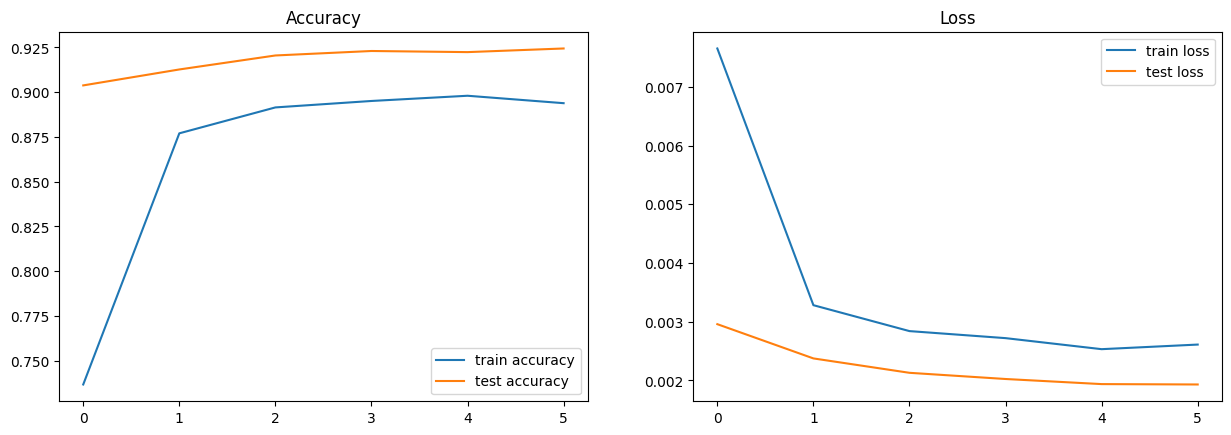

Model is saved to /content/gdrive/MyDrive/ViT/models/2023-08-30_17.57.43_VisionTransformer_92%_FT_CIFAR.pth


In [2]:
# Fine-tune the reference model and th replica and evaluate them
%run fine_tuning.ipynb